In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress


In [2]:
world_happy_year = pd.read_csv("Resources/happy_by_year.csv")
all_variables_ave = pd.read_csv("Resources/all_variables_avg.csv")

In [3]:
world_happy_year_ave = world_happy_year[["year", "Happiness Score mean", "Economy (GDP per Capita) mean", 
                                        "Family mean", "Health (Life Expectancy) mean", "Freedom mean", 
                                         "Trust (Government Corruption) mean", "Generosity mean"]]
world_year_complete = world_happy_year_ave.assign(Workforce_Ratio_mean = [70.64387477, 70.832537, 70.96893882, 71.19846345, 71.23556771], 
                                                  GINI_Index_mean = [36.7975, 36.35789, 36.10299, 39.95172, 'NaN'])
world_year_complete

,year,Happiness Score mean,Economy (GDP per Capita) mean,Family mean,Health (Life Expectancy) mean,Freedom mean,Trust (Government Corruption) mean,Generosity mean,Workforce_Ratio_mean,GINI_Index_mean
0,2015,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,70.643875,36.7975
1,2016,5.382185,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,70.832537,36.3579
2,2017,5.354019,0.984718,1.188898,0.551341,0.408786,0.123120,0.246883,70.968939,36.103
3,2018,5.375917,0.891449,1.213237,0.597346,0.454506,0.112000,0.181006,71.198463,39.9517
4,2019,5.407096,0.905147,1.208814,0.725244,0.392571,0.110603,0.184846,71.235568,NaN


In [4]:
all_variables_ave

,Unnamed: 0,Country,Gini Index Five Year Average,Workforce Ratio Five Year Average,Happy,Economy,Family,Health,Freedom,Trust,Generous
0,0,Albania,33.266667,72.239452,4.8827,9.417931,0.671070,68.708138,0.781994,0.896304,-0.042309
1,1,Argentina,41.533333,67.997396,5.9747,9.810955,0.900568,68.803802,0.831132,0.842010,-0.194914
2,2,Armenia,33.225000,71.844352,4.6768,9.100476,0.757479,66.750656,0.712018,0.773545,-0.138780
3,3,Austria,30.333333,82.749968,7.2942,10.742824,0.928046,73.002502,0.899989,0.499955,0.085429
4,4,Bangladesh,32.400000,42.876669,4.8328,8.287064,0.687293,64.503067,0.900625,0.661844,-0.033665
...,...,...,...,...,...,...,...,...,...,...,...
91,91,United States,41.100000,82.045499,6.9396,10.925769,0.914219,68.299500,0.842620,0.699715,0.149892
92,92,Uruguay,39.750000,75.257850,6.4401,9.948193,0.922811,69.002548,0.892395,0.635994,-0.101103
93,93,Vietnam,35.500000,88.183501,5.3535,8.809546,0.849987,67.952736,0.939593,0.796421,-0.094533
94,94,Zambia,57.100000,88.284661,3.7594,8.224720,0.698824,55.299377,0.806500,0.801290,0.078037


In [5]:
def linreg(x_values, y_values, title, coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coordinates,fontsize=15,color="red")
    plt.xlabel('Happy')
    plt.ylabel(title)
    print(f"The r squared value is: {rvalue}")
    plt.show() 

The r squared value is: 0.7901753138516157


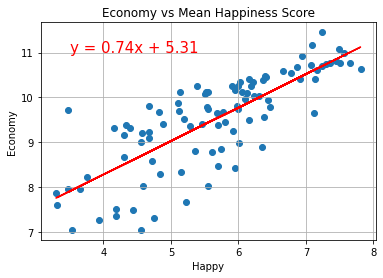

In [17]:
all_variables_ave.plot(kind='scatter', x='Happy', y='Economy')
plt.title("Economy vs Mean Happiness Score")
plt.grid()
x_values = all_variables_ave["Happy"]
y_values = all_variables_ave["Economy"]
linreg(all_variables_ave["Happy"],all_variables_ave["Economy"], "Economy", (3.5, 11))


The r squared value is: 0.7567564279606981


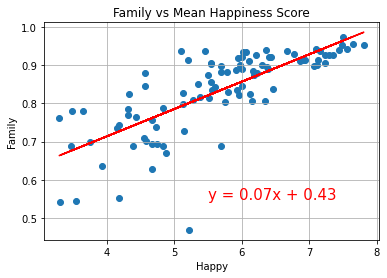

In [18]:
all_variables_ave.plot(kind='scatter', x='Happy', y='Family')
plt.title("Family vs Mean Happiness Score")
plt.grid()
x_values = all_variables_ave["Happy"]
y_values = all_variables_ave["Family"]
linreg(all_variables_ave["Happy"],all_variables_ave["Family"], "Family", (5.5, 0.55))

The r squared value is: 0.7939586758403457


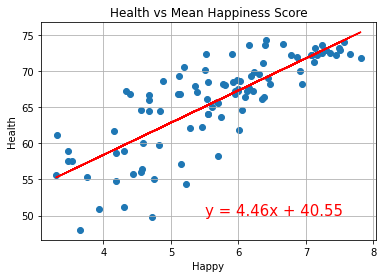

In [19]:
all_variables_ave.plot(kind='scatter', x='Happy', y='Health')
plt.title("Health vs Mean Happiness Score")
plt.grid()
x_values = all_variables_ave["Happy"]
y_values = all_variables_ave["Health"]
linreg(all_variables_ave["Happy"],all_variables_ave["Health"], "Health", (5.5, 50))

The r squared value is: 0.4845113599529789


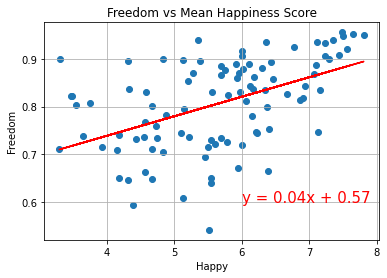

In [21]:
all_variables_ave.plot(kind='scatter', x='Happy', y='Freedom')
plt.title("Freedom vs Mean Happiness Score")
plt.grid()
x_values = all_variables_ave["Happy"]
y_values = all_variables_ave["Freedom"]
linreg(all_variables_ave["Happy"],all_variables_ave["Freedom"], "Freedom", (6, 0.6))

The r squared value is: -0.43581337181161617


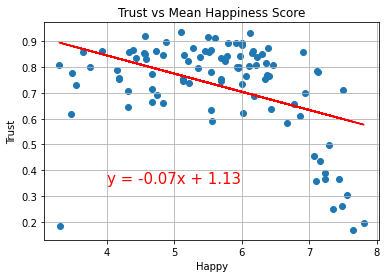

In [22]:
all_variables_ave.plot(kind='scatter', x='Happy', y='Trust')
plt.title("Trust vs Mean Happiness Score")
plt.grid()
x_values = all_variables_ave["Happy"]
y_values = all_variables_ave["Trust"]
linreg(all_variables_ave["Happy"],all_variables_ave["Trust"], "Trust", (4, 0.35))

The r squared value is: 0.0739246312612231


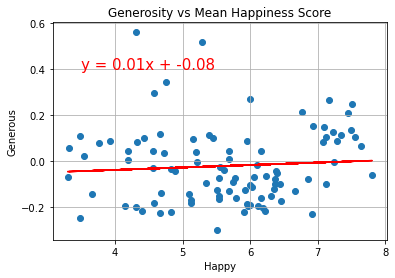

In [14]:
all_variables_ave.plot(kind='scatter', x='Happy', y='Generous')
plt.title("Generosity vs Mean Happiness Score")
plt.grid()
x_values = all_variables_ave["Happy"]
y_values = all_variables_ave["Generous"]
linreg(all_variables_ave["Happy"],all_variables_ave["Generous"], "Generous", (3.5, 0.4))

The r squared value is: 0.07364987781468404


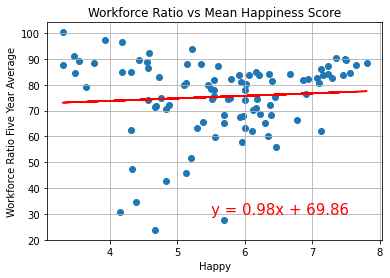

In [23]:
all_variables_ave.plot(kind='scatter', x='Happy', y='Workforce Ratio Five Year Average')
plt.title("Workforce Ratio vs Mean Happiness Score")
plt.grid()
x_values = all_variables_ave["Happy"]
y_values = all_variables_ave["Workforce Ratio Five Year Average"]
linreg(all_variables_ave["Happy"],all_variables_ave["Workforce Ratio Five Year Average"], "Workforce Ratio Five Year Average", (5.5, 30))

The r squared value is: -0.3901861612121619


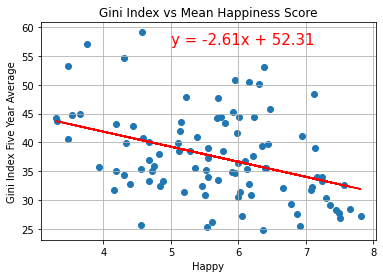

In [24]:
all_variables_ave.plot(kind='scatter', x='Happy', y='Gini Index Five Year Average')
plt.title("Gini Index vs Mean Happiness Score")
plt.grid()
x_values = all_variables_ave["Happy"]
y_values = all_variables_ave["Gini Index Five Year Average"]
linreg(all_variables_ave["Happy"],all_variables_ave["Gini Index Five Year Average"], "Gini Index Five Year Average", (5, 57))

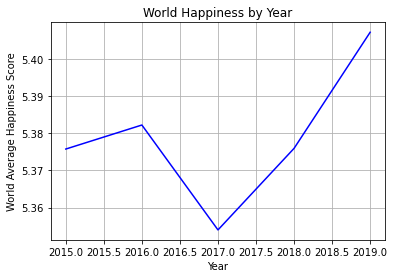

In [18]:
years = world_year_complete["year"]
mean_happy = world_year_complete["Happiness Score mean"]

world_ave_happy, = plt.plot(years, mean_happy, color="blue")

plt.title("World Happiness by Year")
plt.xlabel("Year")
plt.ylabel("World Average Happiness Score")

plt.grid()
plt.show()

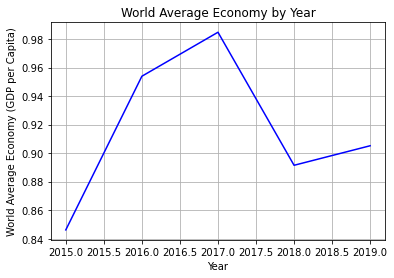

In [19]:
mean_economy = world_year_complete["Economy (GDP per Capita) mean"]

world_ave_economy, = plt.plot(years, mean_economy, color="blue")

plt.title("World Average Economy by Year")
plt.xlabel("Year")
plt.ylabel("World Average Economy (GDP per Capita)")

plt.grid()
plt.show()

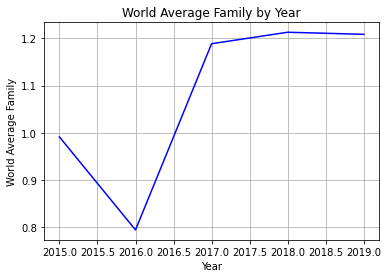

In [20]:
mean_family = world_year_complete["Family mean"]

world_ave_family, = plt.plot(years, mean_family, color="blue")
plt.title("World Average Family by Year")
plt.xlabel("Year")
plt.ylabel("World Average Family")

plt.grid()
plt.show()

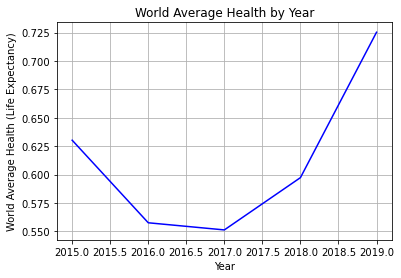

In [21]:
mean_health = world_year_complete["Health (Life Expectancy) mean"]

world_ave_health, = plt.plot(years, mean_health, color="blue")
plt.title("World Average Health by Year")
plt.xlabel("Year")
plt.ylabel("World Average Health (Life Expectancy)")

plt.grid()
plt.show()

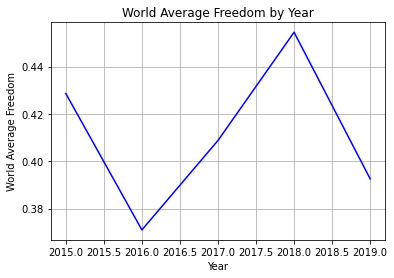

In [22]:
mean_freedom = world_year_complete["Freedom mean"]

world_ave_freedom, = plt.plot(years, mean_freedom, color="blue")
plt.title("World Average Freedom by Year")
plt.xlabel("Year")
plt.ylabel("World Average Freedom")

plt.grid()
plt.show()

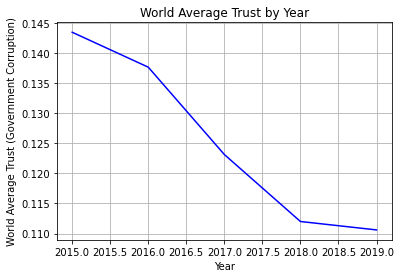

In [23]:
mean_freedom = world_year_complete["Trust (Government Corruption) mean"]

world_ave_freedom, = plt.plot(years, mean_freedom, color="blue")
plt.title("World Average Trust by Year")
plt.xlabel("Year")
plt.ylabel("World Average Trust (Government Corruption)")

plt.grid()
plt.show()

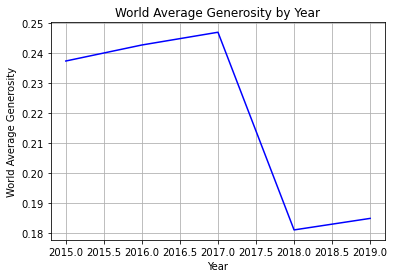

In [24]:
mean_generous = world_year_complete["Generosity mean"]

world_ave_generous, = plt.plot(years, mean_generous, color="blue")
plt.title("World Average Generosity by Year")
plt.xlabel("Year")
plt.ylabel("World Average Generosity")

plt.grid()
plt.show()

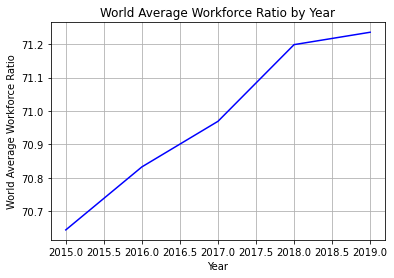

In [25]:
mean_workforce = world_year_complete["Workforce_Ratio_mean"]

world_ave_workforce, = plt.plot(years, mean_workforce, color="blue")
plt.title("World Average Workforce Ratio by Year")
plt.xlabel("Year")
plt.ylabel("World Average Workforce Ratio")

plt.grid()
plt.show()

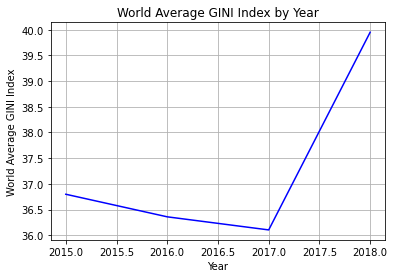

In [26]:
mean_gini = world_year_complete["GINI_Index_mean"]

world_ave_gini, = plt.plot(years, mean_gini, color="blue")
plt.title("World Average GINI Index by Year")
plt.xlabel("Year")
plt.ylabel("World Average GINI Index")

plt.grid()
plt.show()